<a href="https://colab.research.google.com/github/jrchac/ML-Recruitment-Project/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

## Set Up

In this notebook, our primary focus is on conducting a thorough exploration of the data. The goal of this Exploratory Data Analysis (EDA) is to gain a comprehensive understanding of the dataset, identifying key features that will be instrumental in informing subsequent steps, particularly in the context of our machine learning algorithms.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [62]:
import warnings
warnings.filterwarnings('ignore')


To begin, we will upload the dataset comprising recruitment information of various candidates, alongside anonymized details of the companies they applied to, and the corresponding hiring decisions.

In [63]:
data_all = pd.read_csv('recruitmentdataset-2022-1.3.csv')
data_C = data_all[data_all['company']=='C']
print(data_C.shape)
print(data_all.shape)

data_C.head()

(1000, 15)
(4000, 15)


,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
2000,x2351g,male,32,Dutch,Rugby,58,False,False,True,False,1,False,master,C,False
2001,x8375c,male,26,Dutch,Running,61,True,False,False,False,2,False,bachelor,C,True
2002,x3260c,female,25,Dutch,Tennis,61,False,True,False,False,1,False,bachelor,C,False
2003,x9471d,female,31,Belgian,Cricket,56,False,False,False,False,0,False,master,C,False
2004,x6520d,male,22,German,Cricket,72,False,True,False,False,2,True,master,C,False


In [64]:
# data of the hired candidates
data_all_hired = data_all[data_all['decision']==True]
data_C_hired = data_C[data_C['decision']==True]

In [65]:
# data of the failed applications
data_all_failed = data_all[data_all['decision']==False]
data_C_failed = data_C[data_C['decision']==False]

## Exploration of Company C
In this section, we will analyze the data set of company C candiadates

Unique, Null, Duplicate values - Company C:

In [66]:
data_C.nunique()

Id                       1000
gender                      3
age                        12
nationality                 3
sport                       8
ind-university_grade       30
ind-debateclub              2
ind-programming_exp         2
ind-international_exp       2
ind-entrepeneur_exp         2
ind-languages               4
ind-exact_study             2
ind-degree                  3
company                     1
decision                    2
dtype: int64

In [67]:
data_C.isnull().sum()

Id                       0
gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [68]:
data_C.duplicated().sum()

0

Outliers in grades and ages - Company C


In [69]:
# Looking for outliers in Grades
data_mean, data_std = data_C['ind-university_grade'].mean(), data_C['ind-university_grade'].std()
# identify outliers using 3 std
cut_off = data_std * 3
# identify outliers
lower, upper = data_mean - cut_off, data_mean + cut_off
print(f'Lower bound: {lower}')
print(f'Upper bound: {upper}')

outliers = [x for x in data_C['ind-university_grade'] if x < lower or x > upper]
print('Identified outliers Grade: %d' % len(outliers))

Lower bound: 44.63351038706618
Upper bound: 80.05848961293381
Identified outliers Grade: 0


In [70]:
# Looking for outliers in Age
data_mean, data_std = data_C['age'].mean(), data_C['age'].std()
# identify outliers using 3 std
cut_off = data_std * 3
# identify outliers
lower, upper = data_mean - cut_off, data_mean + cut_off
print(f'Lower bound: {lower}')
print(f'Upper bund: {upper}')

outliers = [x for x in data_C['age'] if x < lower or x > upper]
print('Identified outliers Age: %d' % len(outliers))

Lower bound: 17.613610612301585
Upper bund: 34.468389387698416
Identified outliers Age: 0


Relationship between decision and grade / age - Company C

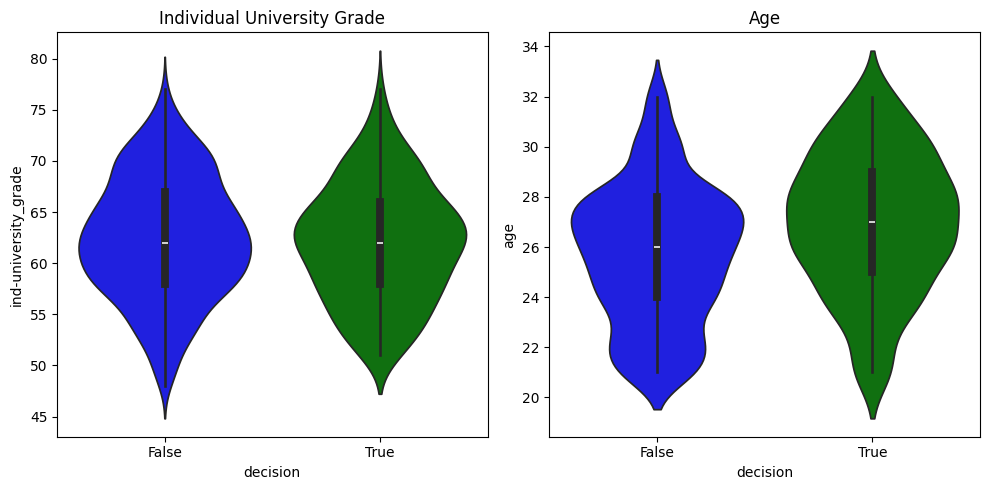

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the violin plot for 'ind-university_grade' on the first subplot
sns.violinplot(x='decision', y='ind-university_grade', data=data_C, palette=["blue", "green"], ax=ax1)
ax1.set_title('Individual University Grade')

# Plot the violin plot for 'age' on the second subplot
sns.violinplot(x='decision', y='age', data=data_C, palette=["blue", "green"], ax=ax2)
ax2.set_title('Age')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Conclusions**:
- Violin Plot Grade:
  - Both "TRUE" and "FALSE" decisions, have almost the same mean, around 62.5.
  - It is visible that the "TRUE"-part has a higher peak and and higher low than the "FALSE"-part. This means that better grades are needed for the decision to be "TRUE".
- Violin Plot Age:
  - The FALSE-part has a lower mean thatn the TRUE-part. In other words, the average age of hired candidatetes is higher than the average age of failed applicants.

## Comparison Company C vs All Companies

### Age Distribution


Distribution of Age among Candidates:

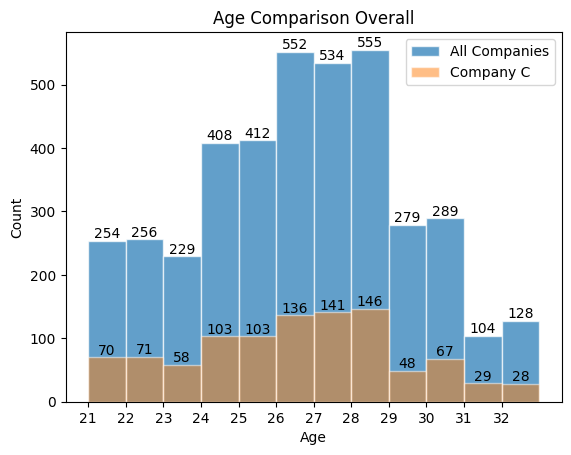

In [72]:
#plt.hist(data_all["age"], np.arange(21, 33.1, 1), alpha = 0.5, label = "All Companies")
v1, bn1, br1 = plt.hist(data_all["age"], np.arange(21, 33.1, 1), alpha = 0.7, label = "All Companies", edgecolor ="white")
plt.bar_label(br1)
v2, bn2, br2 = plt.hist(data_C["age"], np.arange(21, 33.1, 1), alpha = 0.5, label = "Company C", edgecolor ="white")
plt.bar_label(br2)
#plt.hist(data_C["age"], np.arange(21, 33.1, 1), alpha = 0.5, label = "Company C")
plt.xticks(np.arange(21, 33, 1))
plt.title("Age Comparison Overall")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

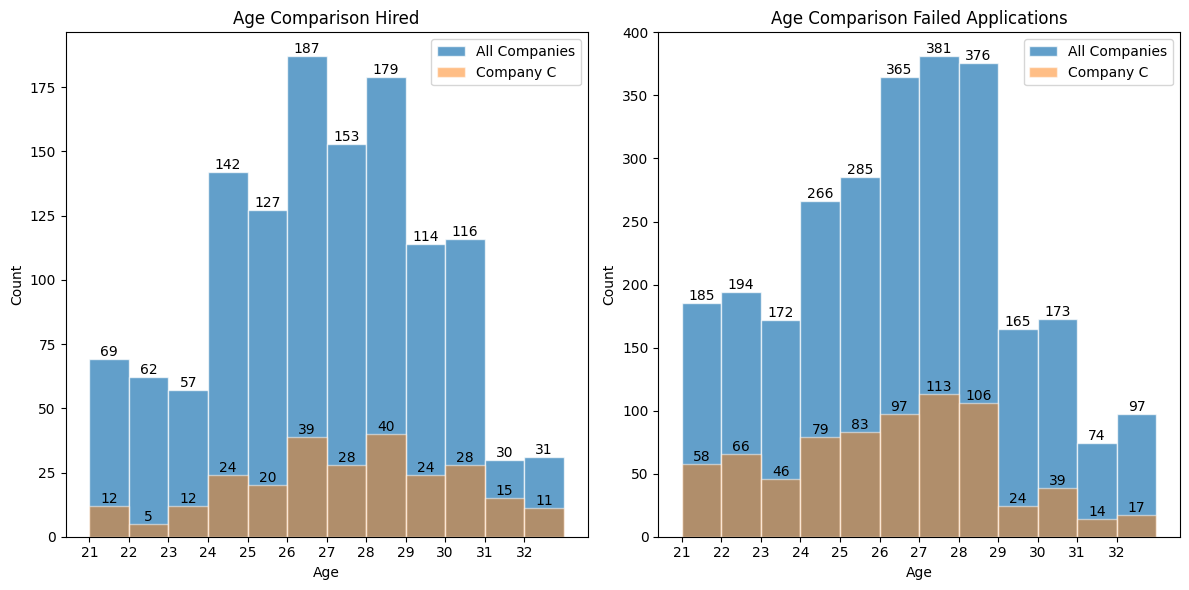

In [73]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v1, bn1, br1 = ax1.hist(data_all_hired["age"], np.arange(21, 33.1, 1), alpha=0.7, label="All Companies", edgecolor="white")
ax1.bar_label(br1)
v2, bn2, br2 = ax1.hist(data_C_hired["age"], np.arange(21, 33.1, 1), alpha=0.5, label="Company C", edgecolor="white")
ax1.bar_label(br2)
ax1.set_xticks(np.arange(21, 33, 1))
ax1.set_title("Age Comparison Hired")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')

# Plot histogram for failed applications
v3, bn3, br3 = ax2.hist(data_all_failed["age"], np.arange(21, 33.1, 1), alpha=0.7, label="All Companies", edgecolor="white")
ax2.bar_label(br3)
v4, bn4, br4 = ax2.hist(data_C_failed["age"], np.arange(21, 33.1, 1), alpha=0.5, label="Company C", edgecolor="white")
ax2.bar_label(br4)
ax2.set_xticks(np.arange(21, 33, 1))
ax2.set_title("Age Comparison Failed Applications")
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Grade Distribution

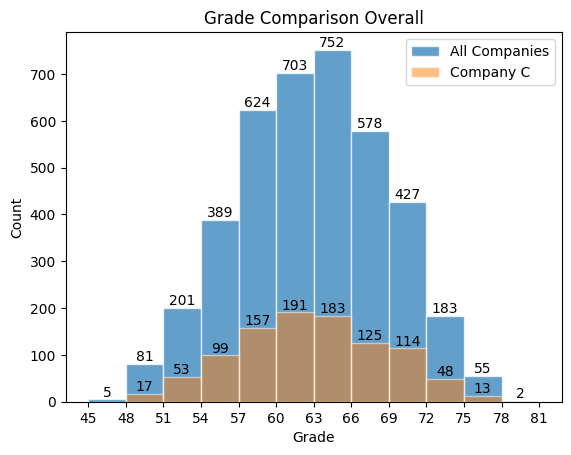

In [74]:
v3, bn3, br3 = plt.hist(data_all["ind-university_grade"], np.arange(45, 81.1, 3), alpha = 0.7, label = "All Companies", edgecolor ="white")
plt.bar_label(br3)
v4, bn4, br4 = plt.hist(data_C["ind-university_grade"], np.arange(48, 78.1, 3), alpha = 0.5, label = "Company C", edgecolor ="white")
plt.bar_label(br4)
plt.xticks(np.arange(45, 81.1, 3))
plt.title("Grade Comparison Overall")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

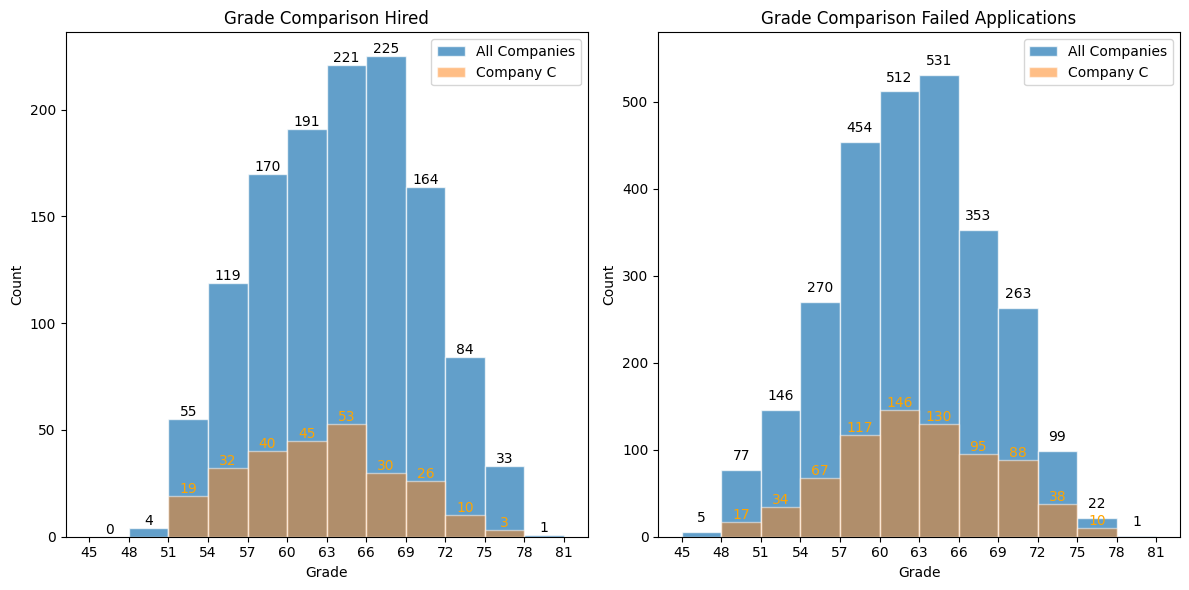

In [75]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v3, bn3, br3 = ax1.hist(data_all_hired["ind-university_grade"], np.arange(45, 81.1, 3), alpha=0.7, label="All Companies", edgecolor="white")
ax1.bar_label(br3)
v4, bn4, br4 = ax1.hist(data_C_hired["ind-university_grade"], np.arange(51, 78.1, 3), alpha=0.5, label="Company C", edgecolor="white")
ax1.bar_label(br4, color='orange')
ax1.set_xticks(np.arange(45, 81.1, 3))
ax1.set_title("Grade Comparison Hired")
ax1.set_xlabel("Grade")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')

# Plot histogram for failed applications
v3, bn3, br3 = ax2.hist(data_all_failed["ind-university_grade"], np.arange(45, 81.1, 3), alpha=0.7, label="All Companies", edgecolor="white")
ax2.bar_label(br3, padding=5)
v4, bn4, br4 = ax2.hist(data_C_failed["ind-university_grade"], np.arange(48, 78.1, 3), alpha=0.5, label="Company C", edgecolor="white")
ax2.bar_label(br4, color='orange')
ax2.set_xticks(np.arange(45, 81.1, 3))
ax2.set_title("Grade Comparison Failed Applications")
ax2.set_xlabel("Grade")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 580])  # Set y-axis limit for better visualization

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Sport Distribution

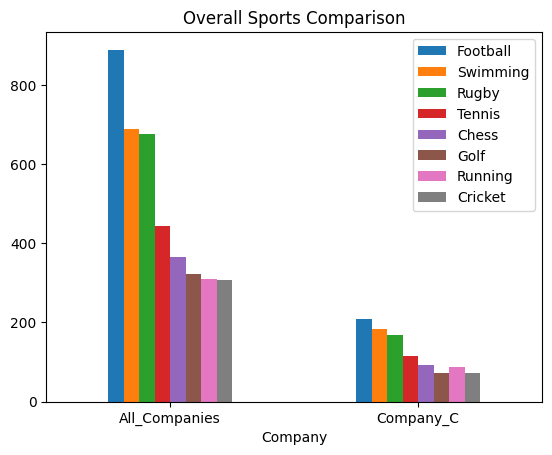

In [76]:
sport_all_overall = data_all['sport'].value_counts()
sport_C_overall = data_C['sport'].value_counts()
sport_all_overall['Company'] = "All_Companies"
sport_C_overall['Company'] = "Company_C"
sport_count_overall = pd.concat([sport_all_overall.to_frame().T,sport_C_overall.to_frame().T])
sport_overall = pd.DataFrame(data=['All_Companies','Company_C'], columns = ["Company"])
sport_overall = sport_overall.merge(sport_count_overall)
sport_overall.plot.bar(x = "Company", rot = 0)
plt.title("Overall Sports Comparison")
plt.show()

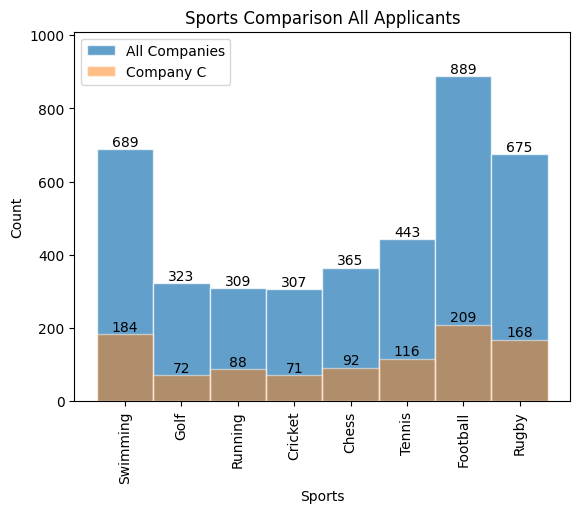

In [77]:
v7, bn7, br7= plt.hist(data_all['sport'],np.arange(0,9,1), alpha = 0.7, label = "All Companies", edgecolor ="white",align='left')
plt.bar_label(br7)
v8, bn8, br8= plt.hist(data_C['sport'],np.arange(0,9,1), alpha = 0.5, label = "Company C", edgecolor ="white",align='left')
plt.xticks(rotation='vertical')
plt.bar_label(br8)
plt.title("Sports Comparison All Applicants")
plt.xlabel("Sports")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.gca().set_ylim([0, 1010])
plt.show()

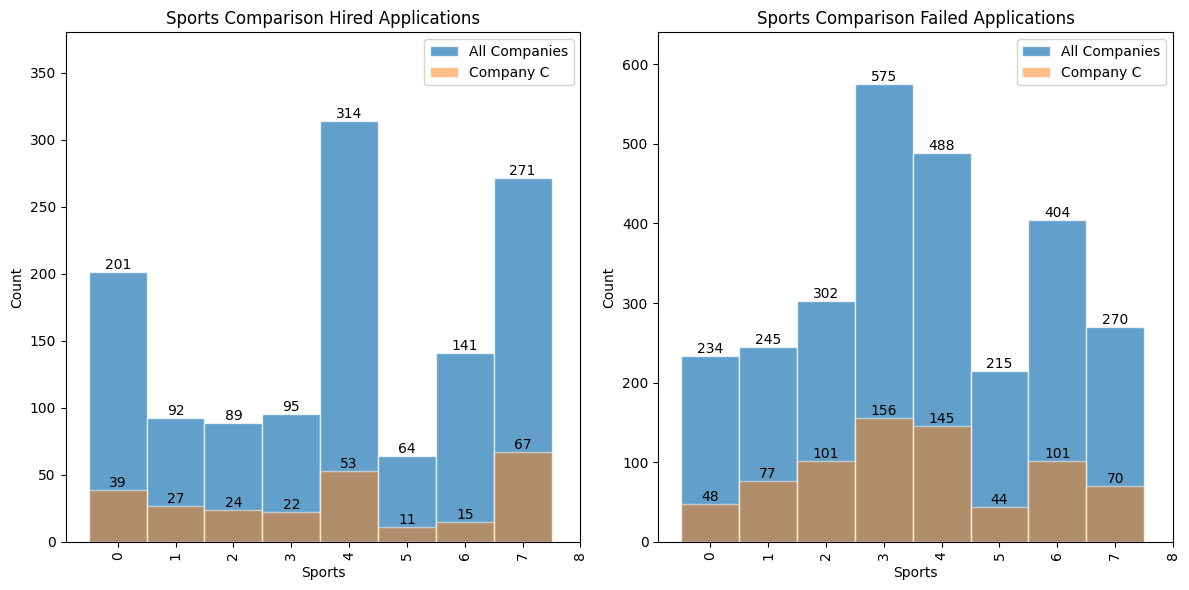

In [78]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v5, bn5, br5 = ax1.hist(data_all_hired['sport'], np.arange(0, 9, 1), alpha=0.7, label="All Companies", edgecolor="white", align='left')
ax1.bar_label(br5)
v6, bn6, br6 = ax1.hist(data_C_hired['sport'], np.arange(0, 9, 1), alpha=0.5, label="Company C", edgecolor="white", align='left')
ax1.bar_label(br6)
ax1.set_xticks(np.arange(0, 9, 1))
ax1.set_xticklabels(np.arange(0, 9, 1), rotation='vertical')
ax1.set_title("Sports Comparison Hired Applications")
ax1.set_xlabel("Sports")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')
ax1.set_ylim([0, 380])

# Plot histogram for failed applications
v9, bn9, br9 = ax2.hist(data_all_failed['sport'], np.arange(0, 9, 1), alpha=0.7, label="All Companies", edgecolor="white", align='left')
ax2.bar_label(br9)
v10, bn10, br10 = ax2.hist(data_C_failed['sport'], np.arange(0, 9, 1), alpha=0.5, label="Company C", edgecolor="white", align='left')
ax2.bar_label(br10)
ax2.set_xticks(np.arange(0, 9, 1))
ax2.set_xticklabels(np.arange(0, 9, 1), rotation='vertical')
ax2.set_title("Sports Comparison Failed Applications")
ax2.set_xlabel("Sports")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 640])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Nationality

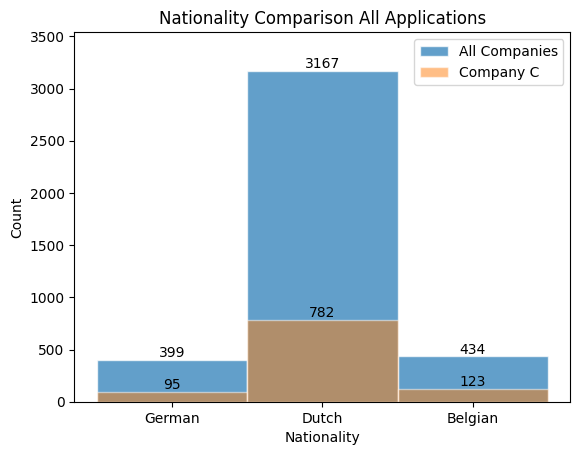

In [79]:
v9, bn9, br9= plt.hist(data_all['nationality'],np.arange(0,4,1), alpha = 0.7, label = "All Companies", edgecolor ="white", align='left')
plt.bar_label(br9)
v10, bn10, br10= plt.hist(data_C['nationality'],np.arange(0,4,1), alpha = 0.5, label = "Company C", edgecolor ="white", align='left')
plt.bar_label(br10)
plt.title("Nationality Comparison All Applications")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.gca().set_ylim([0, 3540])
plt.show()

Nationality hired applications

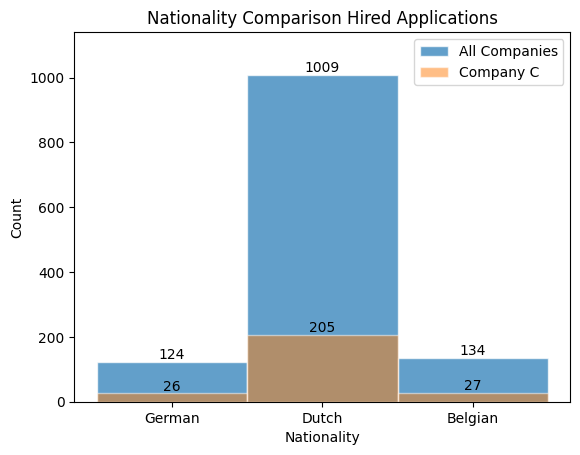

In [80]:
v9, bn9, br9= plt.hist(data_all_hired['nationality'],np.arange(0,4,1), alpha = 0.7, label = "All Companies", edgecolor ="white", align='left')
plt.bar_label(br9)
v10, bn10, br10= plt.hist(data_C_hired['nationality'],np.arange(0,4,1), alpha = 0.5, label = "Company C", edgecolor ="white",  align='left')
plt.bar_label(br10)
plt.title("Nationality Comparison Hired Applications")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.gca().set_ylim([0, 1140])
plt.show()

Nationality failed applications

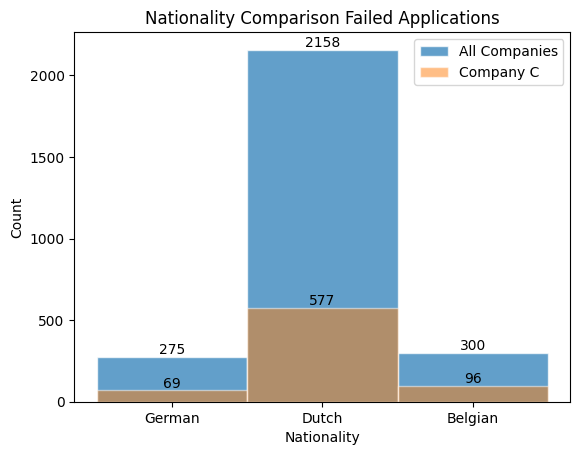

In [81]:
v9, bn9, br9= plt.hist(data_all_failed['nationality'],np.arange(0,4,1), alpha = 0.7, label = "All Companies", edgecolor ="white", align='left')
plt.bar_label(br9)
v10, bn10, br10= plt.hist(data_C_failed['nationality'],np.arange(0,4,1), alpha = 0.5, label = "Company C", edgecolor ="white",  align='left')
plt.bar_label(br10)
plt.title("Nationality Comparison Failed Applications")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()


## Exploring combined features within Company C

In [82]:
#gender & hired
hired_female = data_C_hired[data_C_hired['gender']=='female']
hired_male = data_C_hired[data_C_hired['gender']=='male']
#gender & failed
failed_female = data_C_failed[data_C_failed['gender']=='female']
failed_male = data_C_failed[data_C_failed['gender']=='male']
#gender & all
all_female = data_C[data_C['gender']=='female']
all_male = data_C[data_C['gender']=='male']

### Nationality and Gender

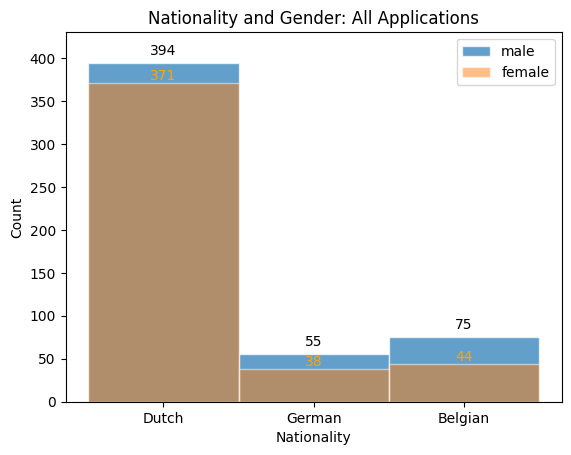

In [83]:
v11, bn11, br11= plt.hist(all_male['nationality'],np.arange(0,4,1), alpha = 0.7, label = "male", edgecolor ="white",align='left')
plt.bar_label(br11, padding = 4)
v12, bn12, br12= plt.hist(all_female['nationality'],np.arange(0,4,1), alpha = 0.5, label = "female", edgecolor ="white",align='left')
plt.bar_label(br12,color='orange')
plt.title("Nationality and Gender: All Applications")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.gca().set_ylim([0, 430])
plt.show()

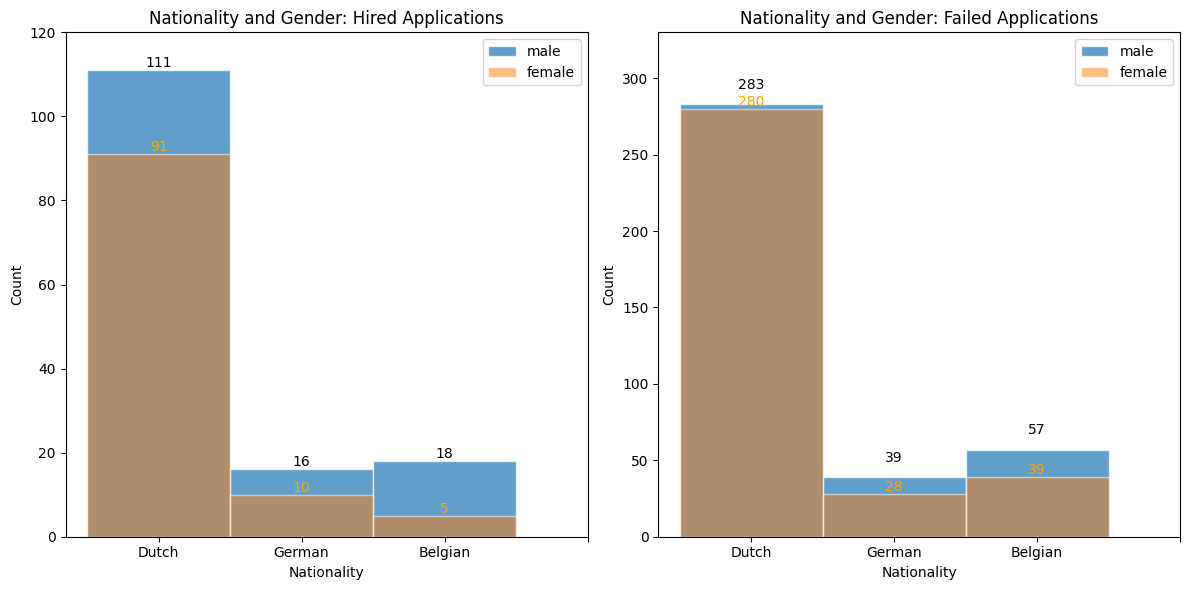

In [84]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v11, bn11, br11 = ax1.hist(hired_male['nationality'], np.arange(0, 4, 1), alpha=0.7, label="male", edgecolor="white", align='left')
ax1.bar_label(br11)
v12, bn12, br12 = ax1.hist(hired_female['nationality'], np.arange(0, 4, 1), alpha=0.5, label="female", edgecolor="white", align='left')
ax1.bar_label(br12, color='orange')
ax1.set_xticks(np.arange(0, 4, 1))
ax1.set_title("Nationality and Gender: Hired Applications")
ax1.set_xlabel("Nationality")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')
ax1.set_ylim([0, 120])

# Plot histogram for failed applications
v13, bn13, br13 = ax2.hist(failed_male['nationality'], np.arange(0, 4, 1), alpha=0.7, label="male", edgecolor="white", align='left')
ax2.bar_label(br13, padding=9)
v14, bn14, br14 = ax2.hist(failed_female['nationality'], np.arange(0, 4, 1), alpha=0.5, label="female", edgecolor="white", align='left')
ax2.bar_label(br14, color='orange')
ax2.set_xticks(np.arange(0, 4, 1))
ax2.set_title("Nationality and Gender: Failed Applications")
ax2.set_xlabel("Nationality")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 330])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Sport and Gender

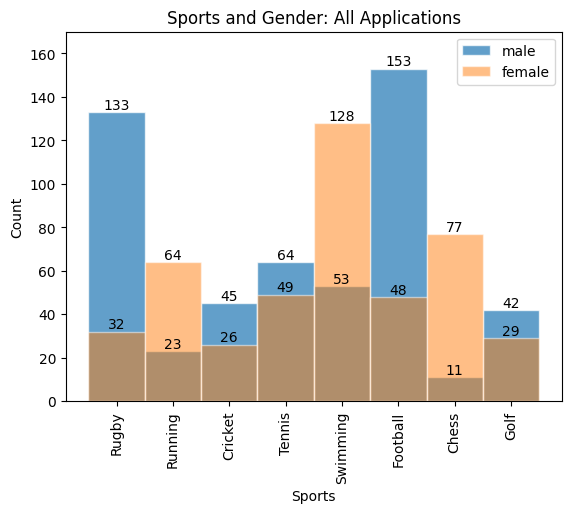

In [85]:
v11, bn11, br11= plt.hist(all_male['sport'],np.arange(0,9,1), alpha = 0.7, label = "male", edgecolor ="white" ,align='left')
plt.bar_label(br11)
v12, bn12, br12= plt.hist(all_female['sport'],np.arange(0,9,1), alpha = 0.5, label = "female", edgecolor ="white",align='left')
plt.bar_label(br12)
plt.xticks(rotation='vertical')
plt.title("Sports and Gender: All Applications")
plt.xlabel("Sports")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.gca().set_ylim([0, 170])
plt.show()

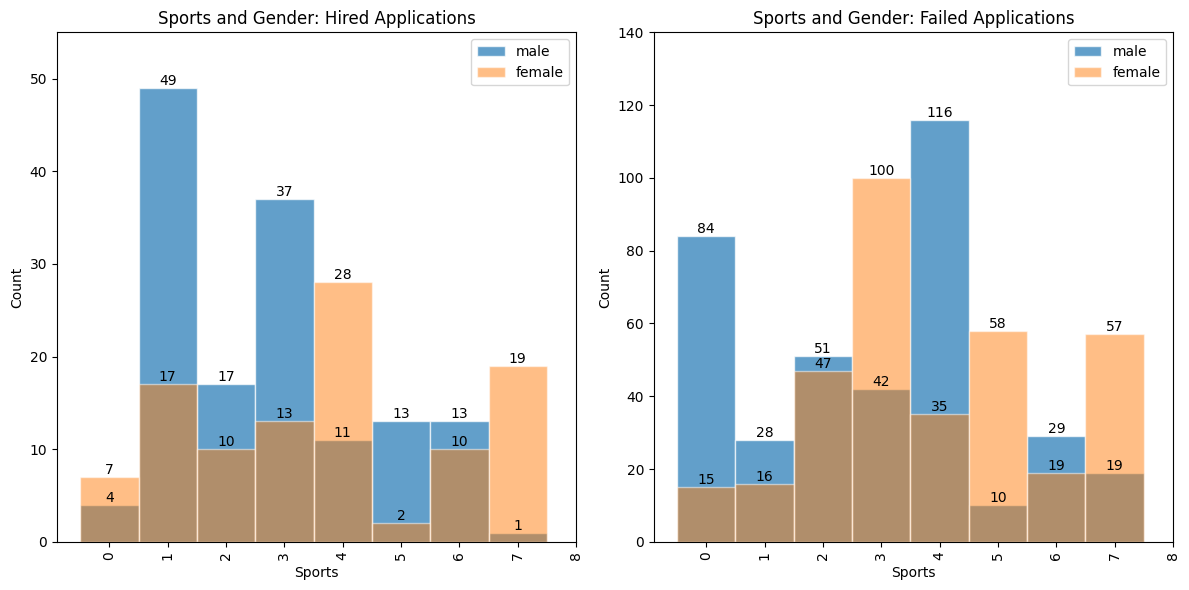

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v11, bn11, br11 = ax1.hist(hired_male['sport'], np.arange(0, 9, 1), alpha=0.7, label="male", edgecolor="white", align='left')
ax1.bar_label(br11)
v12, bn12, br12 = ax1.hist(hired_female['sport'], np.arange(0, 9, 1), alpha=0.5, label="female", edgecolor="white", align='left')
ax1.bar_label(br12)
ax1.set_xticks(np.arange(0, 9, 1))
ax1.set_xticklabels(np.arange(0, 9, 1), rotation='vertical')
ax1.set_title("Sports and Gender: Hired Applications")
ax1.set_xlabel("Sports")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')
ax1.set_ylim([0, 55])

# Plot histogram for failed applications
v13, bn13, br13 = ax2.hist(failed_male['sport'], np.arange(0, 9, 1), alpha=0.7, label="male", edgecolor="white", align='left')
ax2.bar_label(br13)
v14, bn14, br14 = ax2.hist(failed_female['sport'], np.arange(0, 9, 1), alpha=0.5, label="female", edgecolor="white", align='left')
ax2.bar_label(br14)
ax2.set_xticks(np.arange(0, 9, 1))
ax2.set_xticklabels(np.arange(0, 9, 1), rotation='vertical')
ax2.set_title("Sports and Gender: Failed Applications")
ax2.set_xlabel("Sports")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 140])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Age and Gender

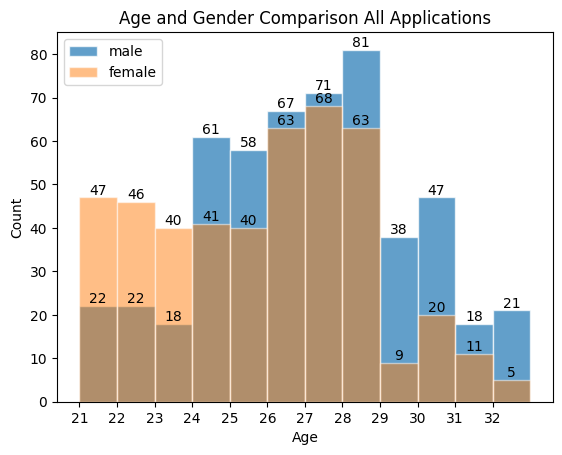

In [87]:
v1, bn1, br1 = plt.hist(all_male["age"], np.arange(21, 33.1, 1), alpha = 0.7, label = "male", edgecolor ="white")
plt.bar_label(br1)
v2, bn2, br2 = plt.hist(all_female["age"], np.arange(21, 33.1, 1), alpha = 0.5, label = "female", edgecolor ="white")
plt.bar_label(br2)
plt.xticks(np.arange(21, 33, 1))
plt.title("Age and Gender Comparison All Applications")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()

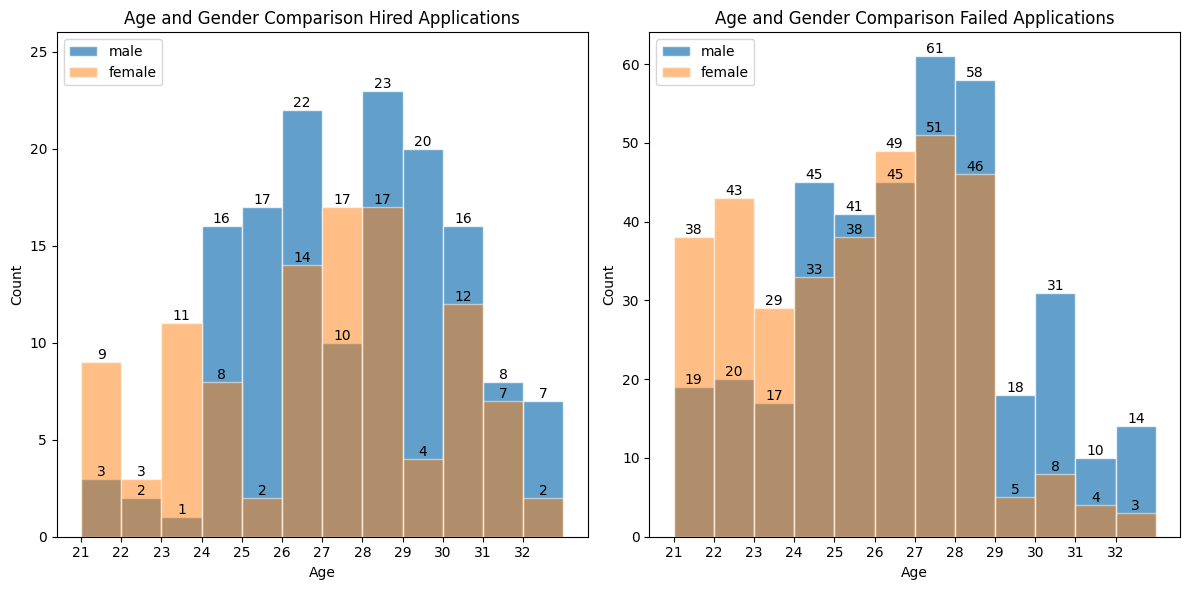

In [88]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v1, bn1, br1 = ax1.hist(hired_male["age"], np.arange(21, 33.1, 1), alpha=0.7, label="male", edgecolor="white")
ax1.bar_label(br1)
v2, bn2, br2 = ax1.hist(hired_female["age"], np.arange(21, 33.1, 1), alpha=0.5, label="female", edgecolor="white")
ax1.bar_label(br2)
ax1.set_xticks(np.arange(21, 33, 1))
ax1.set_title("Age and Gender Comparison Hired Applications")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.legend(loc='upper left')
ax1.set_ylim([0, 26])

# Plot histogram for failed applications
v3, bn3, br3 = ax2.hist(failed_male["age"], np.arange(21, 33.1, 1), alpha=0.7, label="male", edgecolor="white")
ax2.bar_label(br3)
v4, bn4, br4 = ax2.hist(failed_female["age"], np.arange(21, 33.1, 1), alpha=0.5, label="female", edgecolor="white")
ax2.bar_label(br4)
ax2.set_xticks(np.arange(21, 33, 1))
ax2.set_title("Age and Gender Comparison Failed Applications")
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")
ax2.legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Grade and Gender

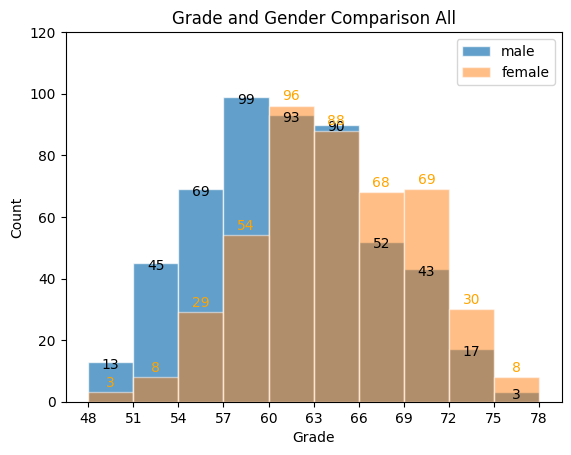

In [89]:
v3, bn3, br3 = plt.hist(all_male["ind-university_grade"], np.arange(48, 78.1, 3), alpha = 0.7, label = "male", edgecolor ="white")
plt.bar_label(br3,padding = -7)
v4, bn4, br4 = plt.hist(all_female["ind-university_grade"], np.arange(48, 78.1, 3), alpha = 0.5, label = "female", edgecolor ="white")
plt.bar_label(br4, color = "orange",padding = 2)
plt.xticks(np.arange(48, 78.1, 3))
plt.title("Grade and Gender Comparison All")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.gca().set_ylim([0, 120])
plt.show()

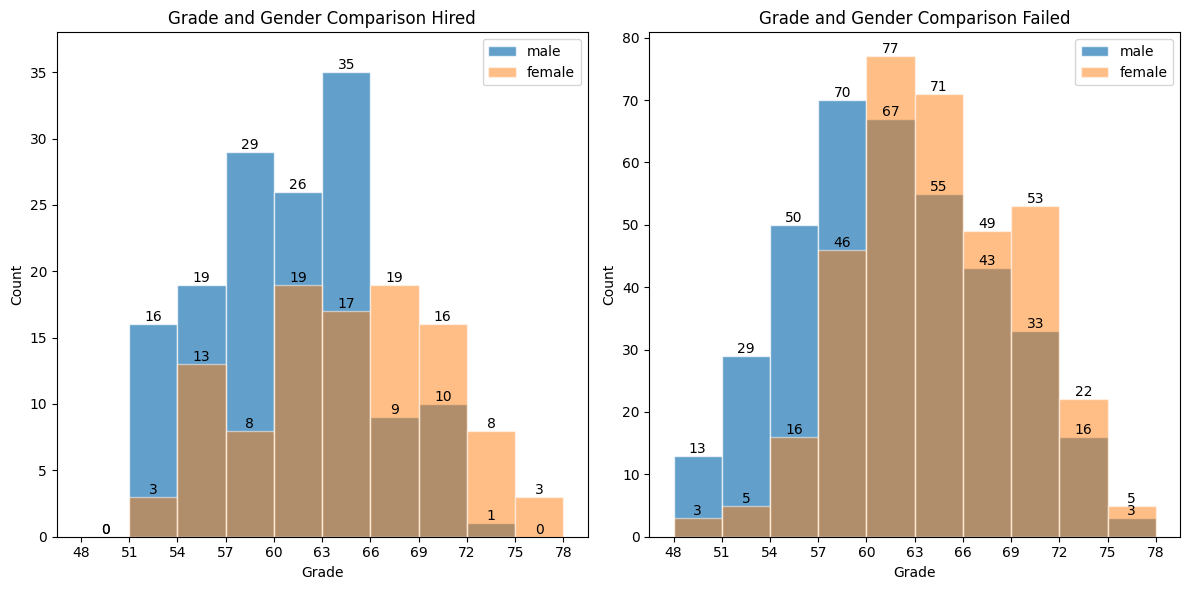

In [90]:
# Create a figure and subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for hired applicants
v3, bn3, br3 = ax1.hist(hired_male["ind-university_grade"], np.arange(48, 78.1, 3), alpha=0.7, label="male", edgecolor="white")
ax1.bar_label(br3)
v4, bn4, br4 = ax1.hist(hired_female["ind-university_grade"], np.arange(48, 78.1, 3), alpha=0.5, label="female", edgecolor="white")
ax1.bar_label(br4)
ax1.set_xticks(np.arange(48, 78.1, 3))
ax1.set_title("Grade and Gender Comparison Hired")
ax1.set_xlabel("Grade")
ax1.set_ylabel("Count")
ax1.legend(loc='upper right')
ax1.set_ylim([0, 38])

# Plot histogram for failed applications
v3, bn3, br3 = ax2.hist(failed_male["ind-university_grade"], np.arange(48, 78.1, 3), alpha=0.7, label="male", edgecolor="white")
ax2.bar_label(br3)
v4, bn4, br4 = ax2.hist(failed_female["ind-university_grade"], np.arange(48, 78.1, 3), alpha=0.5, label="female", edgecolor="white")
ax2.bar_label(br4)
ax2.set_xticks(np.arange(48, 78.1, 3))
ax2.set_title("Grade and Gender Comparison Failed")
ax2.set_xlabel("Grade")
ax2.set_ylabel("Count")
ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Feature Importance

In [91]:
# normalize grades to between 0-1
grades = data_C['ind-university_grade']
data_C['ind-university_grade']= (grades-grades.min())/(grades.max()-grades.min())

In [92]:
# function to one-hot encode categorical data that are currently strings
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [93]:
# perform one-hot encoding for these columns
features_to_encode = ['ind-degree', 'gender', 'sport', 'nationality']
for feature in features_to_encode:
    data_C = encode_and_bind(data_C, feature)

### Logistic regression for feature importance

Feature: 0, age, Score: 0.08066
Feature: 1, ind-university_grade, Score: 0.79109
Feature: 2, ind-debateclub, Score: -0.67295
Feature: 3, ind-programming_exp, Score: -0.60342
Feature: 4, ind-international_exp, Score: 1.62604
Feature: 5, ind-entrepeneur_exp, Score: -0.81051
Feature: 6, ind-languages, Score: 1.23274
Feature: 7, ind-exact_study, Score: -1.08393
Feature: 8, ind-degree_bachelor, Score: -1.62267
Feature: 9, ind-degree_master, Score: 0.36794
Feature: 10, ind-degree_phd, Score: 1.25138
Feature: 11, gender_female, Score: -0.14808
Feature: 12, gender_male, Score: -0.29068
Feature: 13, gender_other, Score: 0.43542
Feature: 14, sport_Chess, Score: 0.34494
Feature: 15, sport_Cricket, Score: 0.46028
Feature: 16, sport_Football, Score: -0.20604
Feature: 17, sport_Golf, Score: 0.12137
Feature: 18, sport_Rugby, Score: -0.18956
Feature: 19, sport_Running, Score: -0.15754
Feature: 20, sport_Swimming, Score: 0.11551
Feature: 21, sport_Tennis, Score: -0.49230
Feature: 22, nationality_Belgia

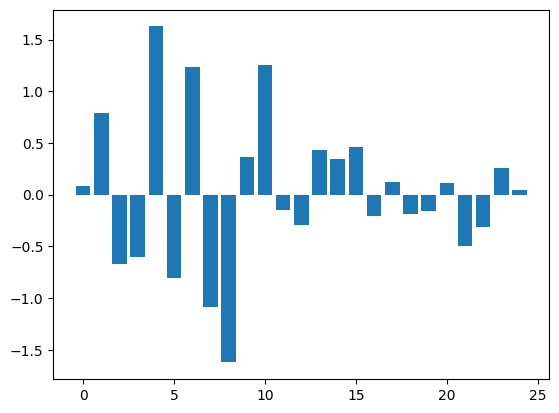

In [94]:
from sklearn.linear_model import LogisticRegression

features = data_C.drop(columns = ['decision', 'Id', 'company'])
X, y = features, data_C['decision']
# Logisitic Regression Model
model = LogisticRegression(solver='lbfgs', max_iter=300, random_state=1)
model.fit(X, y)

# get feature importance
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, %s, Score: %.5f' % (i, features.columns[i], v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
logi_impor_ser = pd.Series(data=abs(importance), index=features.columns)

In [95]:
# feature ranking by logistic regression
# sort absolute values
logi_impor_ser.sort_values(ascending=False)

ind-international_exp    1.626041
ind-degree_bachelor      1.622670
ind-degree_phd           1.251380
ind-languages            1.232738
ind-exact_study          1.083929
ind-entrepeneur_exp      0.810507
ind-university_grade     0.791091
ind-debateclub           0.672949
ind-programming_exp      0.603419
sport_Tennis             0.492299
sport_Cricket            0.460278
gender_other             0.435415
ind-degree_master        0.367941
sport_Chess              0.344939
nationality_Belgian      0.310963
gender_male              0.290682
nationality_Dutch        0.259354
sport_Football           0.206038
sport_Rugby              0.189564
sport_Running            0.157542
gender_female            0.148082
sport_Golf               0.121370
sport_Swimming           0.115508
age                      0.080656
nationality_German       0.048260
dtype: float64

### Random forest for feature importance

Feature: 0, age, Score: 0.13791
Feature: 1, ind-university_grade, Score: 0.15436
Feature: 2, ind-debateclub, Score: 0.02033
Feature: 3, ind-programming_exp, Score: 0.03049
Feature: 4, ind-international_exp, Score: 0.11588
Feature: 5, ind-entrepeneur_exp, Score: 0.01692
Feature: 6, ind-languages, Score: 0.12363
Feature: 7, ind-exact_study, Score: 0.04203
Feature: 8, ind-degree_bachelor, Score: 0.09348
Feature: 9, ind-degree_master, Score: 0.04573
Feature: 10, ind-degree_phd, Score: 0.02014
Feature: 11, gender_female, Score: 0.01757
Feature: 12, gender_male, Score: 0.01868
Feature: 13, gender_other, Score: 0.00610
Feature: 14, sport_Chess, Score: 0.01234
Feature: 15, sport_Cricket, Score: 0.01101
Feature: 16, sport_Football, Score: 0.01705
Feature: 17, sport_Golf, Score: 0.01148
Feature: 18, sport_Rugby, Score: 0.02158
Feature: 19, sport_Running, Score: 0.01220
Feature: 20, sport_Swimming, Score: 0.01734
Feature: 21, sport_Tennis, Score: 0.01081
Feature: 22, nationality_Belgian, Score: 0

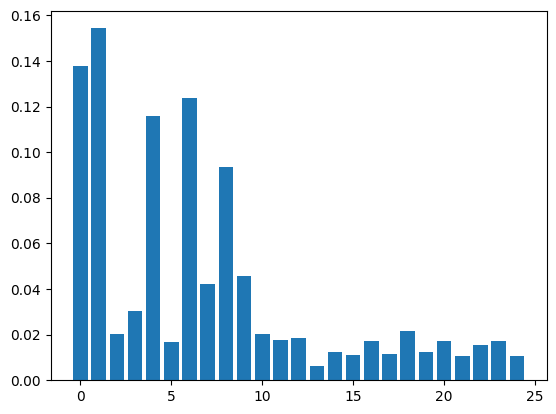

In [96]:
from sklearn.ensemble import RandomForestClassifier

X, y = features, data_C['decision']
model = RandomForestClassifier(random_state=1)
model.fit(X, y)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, %s, Score: %.5f' % (i, features.columns[i], v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
# importance extracting
rf_impor_ser = pd.Series(data=importance, index=features.columns)

In [97]:
# feature ranking by rf
rf_impor_ser.sort_values(ascending=False)

ind-university_grade     0.154357
age                      0.137905
ind-languages            0.123627
ind-international_exp    0.115877
ind-degree_bachelor      0.093477
ind-degree_master        0.045733
ind-exact_study          0.042035
ind-programming_exp      0.030490
sport_Rugby              0.021585
ind-debateclub           0.020329
ind-degree_phd           0.020143
gender_male              0.018675
gender_female            0.017572
sport_Swimming           0.017339
nationality_Dutch        0.017132
sport_Football           0.017046
ind-entrepeneur_exp      0.016916
nationality_Belgian      0.015285
sport_Chess              0.012342
sport_Running            0.012199
sport_Golf               0.011481
sport_Cricket            0.011013
sport_Tennis             0.010808
nationality_German       0.010533
gender_other             0.006100
dtype: float64

### Correlation Matrix for Feature Selection

Finaly, we create a correlation matrix of all features.

In [98]:
data_C
temp = data_C.copy()
cols = ['ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp',
        'sport_Cricket', 'sport_Football', 'sport_Golf',
        'sport_Rugby','sport_Running', 'sport_Swimming', 'sport_Tennis','nationality_Belgian',
        'nationality_Dutch', 'nationality_German', 'ind-exact_study', 'decision',
       'ind-degree_bachelor', 'ind-degree_master', 'ind-degree_phd',
       'gender_female', 'gender_male', 'gender_other']

temp[cols] = temp[cols].replace({True:1, False:0})

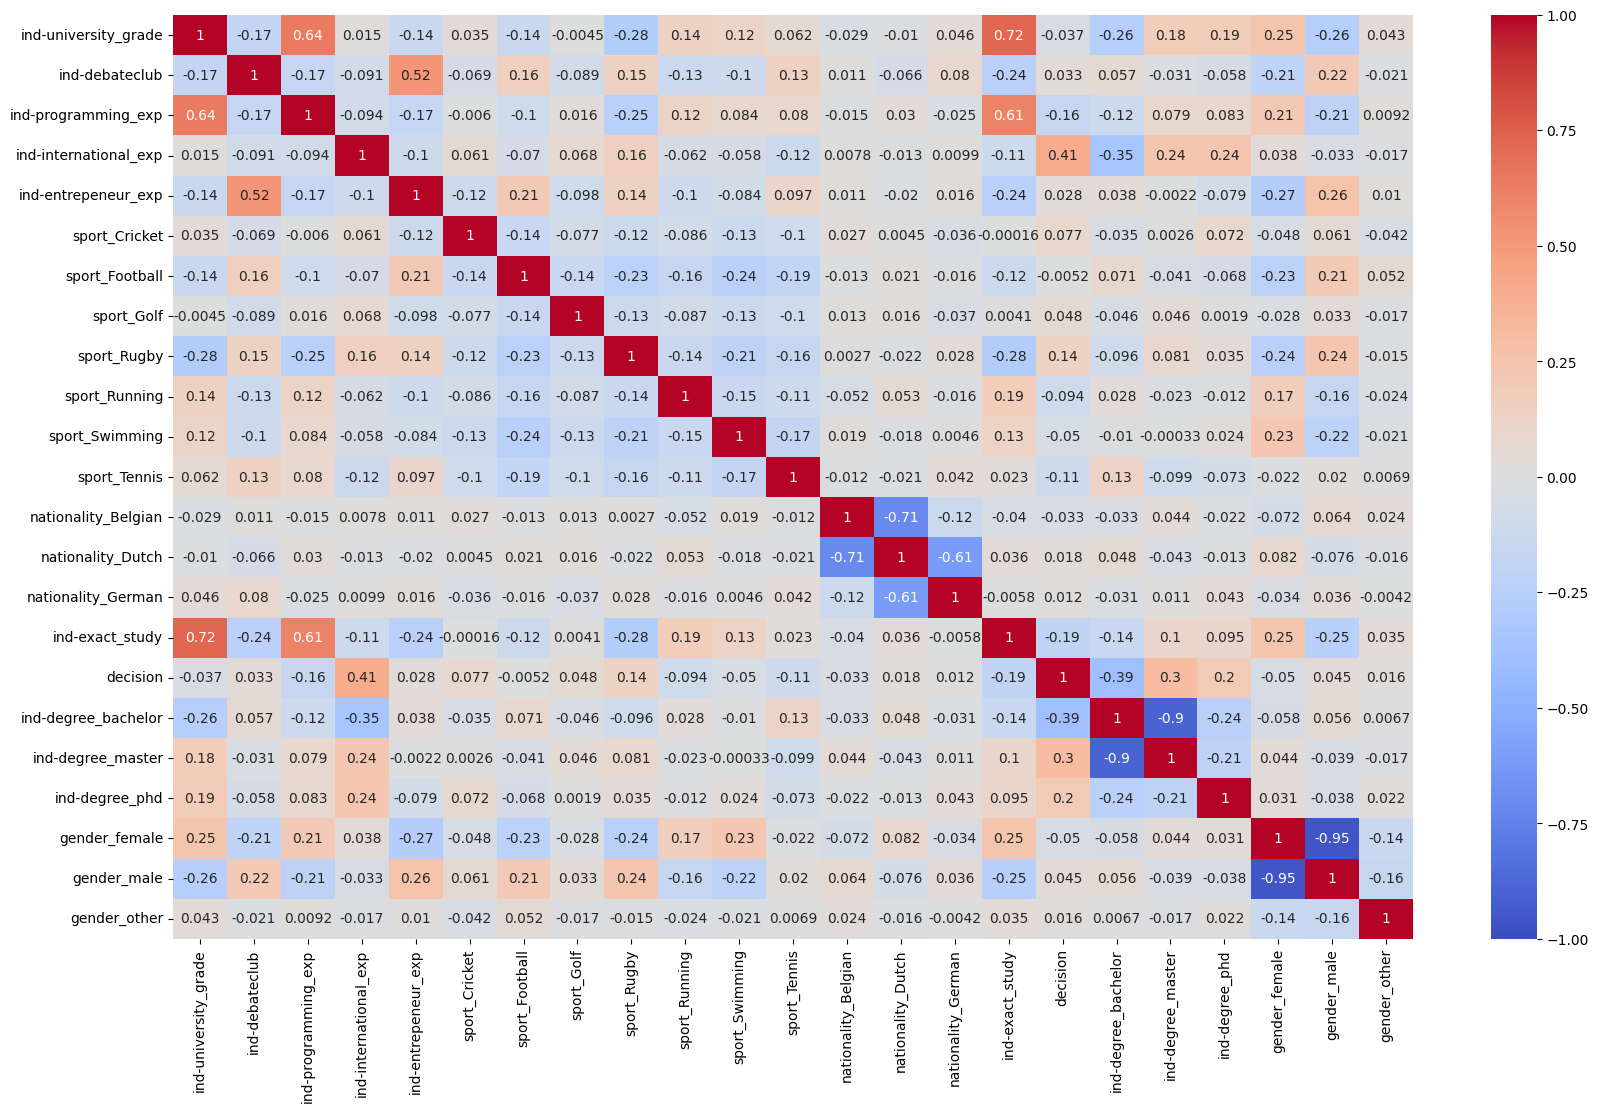

In [99]:
subjective_corr = temp[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(subjective_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()